Importing the Dependencies

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, plot_precision_recall_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

Data Collection & Pre-Processing

In [46]:
# Load the dataset
data = pd.read_csv('mail_data.csv')

# Split the data into features and labels
X = data['Message']
y = data['Category']

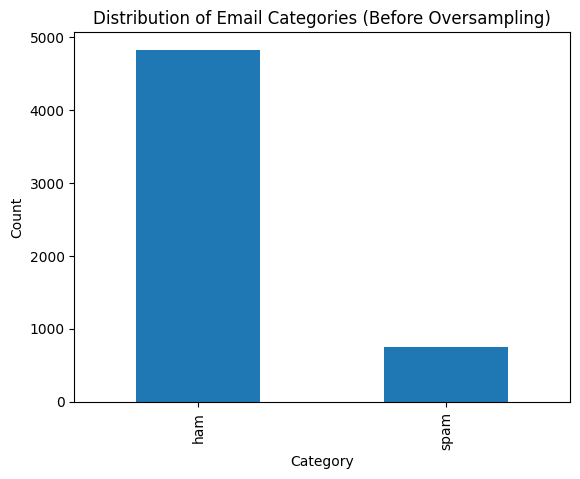

In [47]:
# Analyze the distribution of categories before oversampling
category_counts_before = data['Category'].value_counts()
category_labels = category_counts_before.index
category_counts_before.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Email Categories (Before Oversampling)')
plt.xticks(range(len(category_labels)), category_labels)
plt.show()

In [48]:
# Apply oversampling to balance the classes
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X.values.reshape(-1, 1), y)

# Convert the resampled data back to a DataFrame
data_resampled = pd.DataFrame({'Message': X_resampled.ravel(), 'Category': y_resampled})

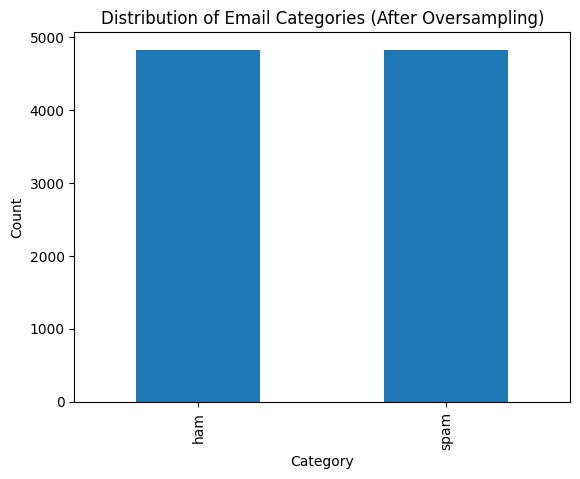

In [49]:
# Analyze the distribution of categories after oversampling
category_counts_after = data_resampled['Category'].value_counts()
category_counts_after.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Email Categories (After Oversampling)')
plt.xticks(range(len(category_labels)), category_labels)
plt.show()

Splitting the data into training data & test data

In [50]:
# Split the resampled data into features and labels
X_resampled = data_resampled['Message']
y_resampled = data_resampled['Category']

In [51]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Feature Extraction

In [52]:
# Convert the text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Training

In [53]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

Evaluation

In [54]:
# Predict the labels for the test set
y_pred = model.predict(X_test_vectorized)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9803108808290155


Confusion Matrix:
[[979  11]
 [ 27 913]]
True Positives (TP): 913
False Positives (FP): 11
True Negatives (TN): 979
False Negatives (FN): 27


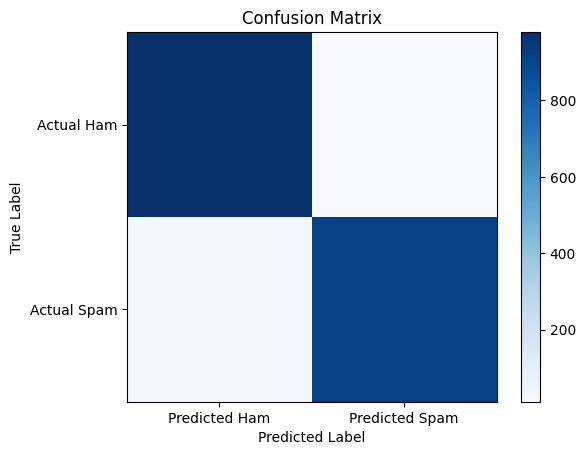

In [55]:
# Generate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

# Extract TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion.ravel()
print('True Positives (TP):', tp)
print('False Positives (FP):', fp)
print('True Negatives (TN):', tn)
print('False Negatives (FN):', fn)

# Confusion Matrix
plt.figure()
plt.imshow(confusion, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Ham', 'Predicted Spam'])
plt.yticks([0, 1], ['Actual Ham', 'Actual Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       990
        spam       0.99      0.97      0.98       940

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



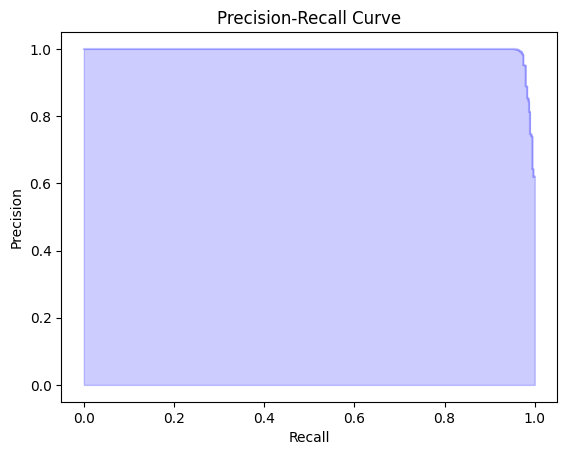

In [56]:
# Print classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test.map({'spam': 1, 'ham': 0}), y_prob)
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

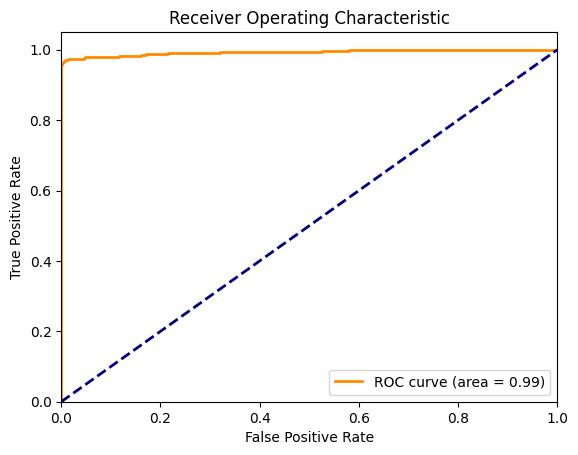

In [57]:
# Calculate probabilities for the positive class
y_prob = model.predict_proba(X_test_vectorized.toarray())[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.map({'spam': 1, 'ham': 0}), y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [58]:

# Perform cross-validation with 5 folds
scores = cross_val_score(model, X_train_vectorized, y_train, cv=5, scoring='accuracy')

# Print the accuracy scores for each fold
print('Accuracy scores for each fold:', scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print('Mean Accuracy:', mean_accuracy)

Accuracy scores for each fold: [0.98186528 0.98316062 0.98510363 0.98316062 0.97862694]
Mean Accuracy: 0.9823834196891192


Example email

In [59]:
with open('test.txt', 'r') as file:
    input_mail = [file.read()]

# Convert text to feature vectors
input_data_features = vectorizer.transform(input_mail)

# Making prediction
prediction = model.predict(input_data_features)
print(prediction)

['spam']
